In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

In [2]:
weekly_returns = pd.read_parquet(path=r"funnel\financial_data\all_etfs_rets.parquet.gzip")

In [3]:
weekly_returns.columns

MultiIndex([('DK0016111511',          'Wealth Invest Amalie Global AK'),
            ('DK0060821064',              'BankInvest Danske Aktier W'),
            ('DK0016112832',       'BankInvest Emerging Markets Obl A'),
            ('DK0060019552',   'BankInvest Emerging Markets Obl Akk A'),
            ('DK0060822112', 'BankInvest Em Markets Obl Lokalvaluta W'),
            ('DK0060823193',   'BankInvest Emerging Markets Obl Akk W'),
            ('DK0016060346',              'BankInvest Danske Aktier A'),
            ('DK0060012037', 'BankInvest Em Markets Obl Lokalvaluta A'),
            ('DK0016026750',              'BankInvest Almen Bolig udb'),
            ('DK0060822039',       'BankInvest Emerging Markets Obl W'),
            ...
            ('DK0061545654',    'Nordea Invest Stabil Balanceret KL 2'),
            ('DK0061542206',              'Nordea Invest Basis 3 KL 2'),
            ('DK0061544681',        'Nordea Invest HøjrenteLande KL 2'),
            ('DK0061541828',       

In [4]:
names = weekly_returns.columns.get_level_values(1)
# Set the columns to be only the first part of the tuple (the ISIN)
weekly_returns.columns = weekly_returns.columns.get_level_values(0)
# create dictionary using the ISIN as key and the name as value. 
isin_dict = dict(zip(weekly_returns.columns, names))
# Map the existing columns to their corresponding ISIN names
weekly_returns.columns = weekly_returns.columns.map(isin_dict)

In [5]:
weekly_returns_og_return = weekly_returns.copy()
weekly_returns_og_risk = weekly_returns.copy()

In [6]:
weekly_returns

,Wealth Invest Amalie Global AK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,BankInvest Em Markets Obl Lokalvaluta W,BankInvest Emerging Markets Obl Akk W,BankInvest Danske Aktier A,BankInvest Em Markets Obl Lokalvaluta A,BankInvest Almen Bolig udb,BankInvest Emerging Markets Obl W,...,Nordea Invest Stabil Balanceret KL 2,Nordea Invest Basis 3 KL 2,Nordea Invest HøjrenteLande KL 2,Nordea Invest Aktier KL 2,Nordea Invest Aktier II KL 2,Nordea Invest European Sm Cap Stars KL2,Nordea Invest Emerging Markets KL 2,Nordea Invest Stabile Aktier Akk KL 2,Nordea Invest Basis 4 KL 2,Nordea Invest European Stars KL 2
2013-01-09 00:00:00+00:00,0.013074,0.014113,0.001879,0.002769,0.011412,0.002769,0.014113,0.011412,0.001283,0.001879,...,0.009270,0.013735,0.000869,0.015835,0.015204,0.008671,0.013532,0.013222,0.012706,-0.002460
2013-01-16 00:00:00+00:00,-0.011245,0.000155,0.000134,0.000132,-0.017181,0.000132,0.000155,-0.017181,-0.000296,0.000134,...,-0.000810,-0.004976,-0.000395,-0.005092,-0.005133,-0.007494,-0.018481,0.006167,-0.004347,0.000260
2013-01-23 00:00:00+00:00,0.009563,0.012987,0.002143,0.001775,-0.001826,0.001775,0.012987,-0.001826,-0.001479,0.002143,...,0.004506,0.006847,0.000869,0.010865,0.010286,0.016489,0.010520,0.008883,0.006648,0.008304
2013-01-30 00:00:00+00:00,-0.008705,0.005342,-0.006283,-0.006300,-0.018123,-0.006300,0.005342,-0.018123,-0.003160,-0.006283,...,-0.003858,-0.007182,-0.007656,-0.006932,-0.006755,-0.009940,-0.024998,0.011799,-0.003746,-0.010423
2013-02-06 00:00:00+00:00,-0.001420,0.001366,-0.008340,-0.008453,0.005413,-0.008453,0.001366,0.005413,0.001090,-0.008340,...,-0.002342,-0.003232,-0.011215,-0.000392,-0.000390,-0.001269,0.001224,-0.003655,-0.004947,-0.008843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,-0.001854,0.008015,-0.001367,-0.001477,0.006608,-0.001392,0.008021,0.006486,0.000103,-0.001344,...,0.001289,0.001670,-0.001061,0.003621,0.003511,-0.002326,-0.004054,0.009702,0.002234,0.000505
2024-07-03 00:00:00+00:00,-0.000531,-0.003893,-0.001369,-0.001420,-0.007758,-0.001394,-0.003979,-0.007753,0.000620,-0.001154,...,-0.013037,-0.001608,-0.005212,-0.000442,-0.000557,0.009080,0.018598,-0.010389,-0.001688,0.006464
2024-07-10 00:00:00+00:00,0.009450,0.001414,0.006656,0.006934,0.017642,0.006980,0.001248,0.017656,0.002064,0.006546,...,-0.003262,0.003400,0.009217,0.004715,0.004712,0.001034,0.012540,0.000583,0.003653,0.004917
2024-07-17 00:00:00+00:00,-0.008520,-0.030308,0.004862,0.004944,-0.001478,0.004967,-0.030421,-0.001695,0.003090,0.004973,...,0.019143,0.001784,0.005480,-0.001320,-0.001321,0.015185,-0.013541,0.021911,0.000876,-0.003495


In [7]:
# List of entities to filter
entities_to_filter = ["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"]

In [8]:
# weekly returns 3y, 5y, 10y
weekly_returns_all_funds_3y = weekly_returns.loc['2021-07-21':'2024-07-24']
weekly_returns_all_funds_5y = weekly_returns.loc['2019-07-24':'2024-07-24']
weekly_returns_all_funds_10y = weekly_returns.loc['2014-07-23':'2024-07-24']
# filter. Only keep the ones that are not in entities to filter
weekly_returns_all_funds_3y = weekly_returns_all_funds_3y.loc[:, ~weekly_returns_all_funds_3y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_5y = weekly_returns_all_funds_5y.loc[:, ~weekly_returns_all_funds_5y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_10y = weekly_returns_all_funds_10y.loc[:, ~weekly_returns_all_funds_10y.columns.isin(entities_to_filter)]
# annualized returns 3y, 5y, 10y
cumulative_return_all_funds_3y = (1 + weekly_returns_all_funds_3y).prod() - 1
annualized_returns_3y = (1 + cumulative_return_all_funds_3y)**(1/3) - 1
cumulative_return_all_funds_5y = (1 + weekly_returns_all_funds_5y).prod() - 1
annualized_returns_5y = (1 + cumulative_return_all_funds_5y)**(1/5) - 1
cumulative_return_all_funds_10y = (1 + weekly_returns_all_funds_10y).prod() - 1
annualized_returns_10y = (1 + cumulative_return_all_funds_10y)**(1/10) - 1

# annualized standard deviation 3y, 5y, 10y
annualized_std_3y = weekly_returns_all_funds_3y.std() * np.sqrt(52)
annualized_std_5y = weekly_returns_all_funds_5y.std() * np.sqrt(52)
annualized_std_10y = weekly_returns_all_funds_10y.std() * np.sqrt(52)

In [9]:
weekly_returns = weekly_returns[entities_to_filter]

In [10]:
# Portfolio value
portfolio_value = 158*317.08 + 1339*186.72 + 633*237.06 + 1009*198.17 + 315*317.27 + 3046*82.07
print(portfolio_value)

1000054.5


In [11]:
# Amount dataframe that shows Shares owned of each ETF
amount = pd.DataFrame(data=[158, 1339, 633, 1009, 315, 3046], 
                      index=["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"], columns=["Amount"])

In [12]:
amount

,Amount
Sydinvest Global EM Equities B EUR Acc,158
Sydinvest Europa Value A DKK,1339
Sydinvest Virksomhedsobl HY A DKK,633
Sydinvest Korte Obligationer A DKK,1009
Sydinvest Fjernøsten A DKK Akk,315
Sydinvest USA Value A DKK,3046


In [13]:
# Price on July 1st, 2024
price_today = pd.DataFrame(data=[317.08, 186.72, 237.06, 198.17, 317.27, 82.07], 
                           index=["Sydinvest Global EM Equities B EUR Acc",
                                  "Sydinvest Europa Value A DKK",
                                  "Sydinvest Virksomhedsobl HY A DKK", 
                                  "Sydinvest Korte Obligationer A DKK", 
                                  "Sydinvest Fjernøsten A DKK Akk", 
                                  "Sydinvest USA Value A DKK"], 
                           columns=["Price"])

# Initialize weekly prices DataFrame
weekly_prices = pd.DataFrame(index=weekly_returns.index, columns=weekly_returns.columns)
weekly_prices.loc[weekly_prices.index[-1]] = price_today['Price']

# Backtrace the prices using the returns
for i in range(len(weekly_returns) - 2, -1, -1):
    weekly_prices.iloc[i] = weekly_prices.iloc[i + 1] / (1 + weekly_returns.iloc[i + 1])

weekly_prices = weekly_prices[::-1]  # Reorder for chronological order
# reindex the weekly prices to match the weekly returns
weekly_prices = weekly_prices.reindex(weekly_returns.index)

In [14]:
# Calculate the value of the portfolio by multiplying the amount of shares with the weekly prices for each fund
# create a dataframe with dates as index and the value of the portfolio as the only column

portfolio_value = np.dot(weekly_prices, amount)
portfolio_value = pd.DataFrame(portfolio_value, index=weekly_returns.index, columns=['Portfolio Value'])
portfolio_value

,Portfolio Value
2013-01-09 00:00:00+00:00,585175.525693
2013-01-16 00:00:00+00:00,582432.754797
2013-01-23 00:00:00+00:00,584628.760766
2013-01-30 00:00:00+00:00,582886.767316
2013-02-06 00:00:00+00:00,579623.616731
...,...
2024-06-26 00:00:00+00:00,996782.039991
2024-07-03 00:00:00+00:00,998520.128335
2024-07-10 00:00:00+00:00,1001061.411432
2024-07-17 00:00:00+00:00,1008771.160833


In [15]:
# portfolio_returns
portfolio_returns = portfolio_value.pct_change()
# change the name of the column to Portfolio Returns
portfolio_returns.columns = ['Portfolio Returns']

____________________________________

## Portfolio Stats for Task 5

In [16]:
portfolio_returns_1824 = portfolio_returns.loc['2018-01-17':'2024-07-24']

In [17]:
portfolio_returns_1824_new = portfolio_returns_1824.groupby(np.arange(len(portfolio_returns_1824)) // 4).apply(lambda x: (1 + x).prod() - 1)   
portfolio_returns_1824_new.index = portfolio_returns_1824.groupby(np.arange(len(portfolio_returns_1824)) // 4).apply(lambda x: x.index[-1])

In [18]:
# result = result ** (1 / float(len(data.index) / 52)) - 1
# result = 1
# for i in range(len(data.index)):
#     result *= 1 + data.iloc[i, :]

In [19]:
# annualized portfolio return
cumulative_return_portfolio_1824 = (1 + portfolio_returns_1824_new).prod() - 1
portfolio_returns_1824_annual = (1 + cumulative_return_portfolio_1824)**(1/6.5) - 1

# annualized portfolio std
portfolio_returns_1824_std = portfolio_returns_1824.std() * np.sqrt(12)

In [20]:
portfolio_returns_1824_annual * 100

Portfolio Returns    3.498365
dtype: float64

In [21]:
portfolio_returns_1824_std * 100

Portfolio Returns    4.848565
dtype: float64

## Creating the two Regret Portfolios

### Minimizing Regret

In [22]:
# Markovich Portfolio for maximizing Return:
# weights of each fund: (dictionary)
weights_return = {
    "Fundamental Invest Stock Pick": 0.1969283954,
    "BGF Swiss Small & MidCap Opps D2 CHF": 0.1105463934,
    "Nykredit Alpha Mira": 0.3548561775,
    "Danske Inv Hedge Fixed Income Strat DKK": 0.3376691237
}

# entities to filter
entities_to_filter_return = ["Fundamental Invest Stock Pick",
                      "BGF Swiss Small & MidCap Opps D2 CHF",
                      "Nykredit Alpha Mira", 
                      "Danske Inv Hedge Fixed Income Strat DKK"]

In [23]:
# only keep weekly_returns_og columns that are in entities_to_filter_return
weekly_returns_og_return = weekly_returns_og_return.loc[:, weekly_returns_og_return.columns.isin(entities_to_filter_return)]

weekly_returns_og_return = weekly_returns_og_return.loc['2018-01-17':'2024-07-24']

In [24]:
weekly_returns_og_return_new = weekly_returns_og_return.groupby(np.arange(len(weekly_returns_og_return)) // 4).apply(lambda x: (1 + x).prod() - 1)   
weekly_returns_og_return_new.index = weekly_returns_og_return.groupby(np.arange(len(weekly_returns_og_return)) // 4).apply(lambda x: x.index[-1])

In [25]:
# Find the portfolio value at 2018-01-17
portfolio_value.loc['2018-01-17']

Portfolio Value    798541.905215
Name: 2018-01-17 00:00:00+00:00, dtype: object

In [26]:
# Based on the weights of each an our starting Budget of 798541.91 DKK, we can calculate how much money of each fund we should own
# Budget
budget = 798541.905215

# Calculate the amount of each fund we should own
amount_return = {isin: budget * weight for isin, weight in weights_return.items()}

In [27]:
# Initialize weekly value DataFrame
weekly_value_return = pd.DataFrame(index=weekly_returns_og_return_new.index, columns=weekly_returns_og_return_new.columns)
weekly_value_return.loc[weekly_value_return.index[0]] = amount_return

# Now go through the weekly returns and calculate the value_return of the portfolio
for i in range(1, len(weekly_returns_og_return_new)):
    weekly_value_return.iloc[i] = weekly_value_return.iloc[i - 1] * (1 + weekly_returns_og_return_new.iloc[i])
weekly_value_return

,BGF Swiss Small & MidCap Opps D2 CHF,Danske Inv Hedge Fixed Income Strat DKK,Fundamental Invest Stock Pick,Nykredit Alpha Mira
2018-02-07 00:00:00+00:00,88275.9276,269642.945372,157255.576054,283367.528058
2018-03-07 00:00:00+00:00,84908.087231,269824.201613,167891.35731,284066.98166
2018-04-04 00:00:00+00:00,81798.813869,269947.40847,163327.998009,297734.082981
2018-05-02 00:00:00+00:00,86685.023012,270890.414799,169877.76077,293481.849183
2018-05-30 00:00:00+00:00,90620.361684,272020.600776,164636.608397,297467.624467
...,...,...,...,...
2024-04-24 00:00:00+00:00,140577.104728,383908.420242,220761.659867,268790.028168
2024-05-22 00:00:00+00:00,142127.024967,394161.244649,232078.210087,271532.329286
2024-06-19 00:00:00+00:00,144820.68536,395549.691213,227031.34329,274996.291107
2024-07-17 00:00:00+00:00,145598.402936,405608.227943,222173.450074,283800.524578


In [28]:
# Calculate the value of the portfolio by summing the value of each fund for each week
portfolio_value_return = weekly_value_return.sum(axis=1)
portfolio_value_return = pd.DataFrame(portfolio_value_return, columns=['Portfolio Value'])

In [29]:
portfolio_value_return

,Portfolio Value
2018-02-07 00:00:00+00:00,7.985420e+05
2018-03-07 00:00:00+00:00,8.066906e+05
2018-04-04 00:00:00+00:00,8.128083e+05
2018-05-02 00:00:00+00:00,8.209350e+05
2018-05-30 00:00:00+00:00,8.247452e+05
...,...
2024-04-24 00:00:00+00:00,1.014037e+06
2024-05-22 00:00:00+00:00,1.039899e+06
2024-06-19 00:00:00+00:00,1.042398e+06
2024-07-17 00:00:00+00:00,1.057181e+06


### Maximizie Exp Return for downside regret less than expected downside regret of SydInvest Portfolio

In [30]:
# Markovich Portfolio for minimizing Risk:
# weights of each fund: (dictionary)
weights_risk = {
    "Fundamental Invest Stock Pick": 0.9683319807,
    "BGF Swiss Small & MidCap Opps D2 CHF": 0.0316680193,
}

# entities to filter
entities_to_filter_risk = ["Fundamental Invest Stock Pick",
    "BGF Swiss Small & MidCap Opps D2 CHF"]

In [31]:
# only keep weekly_returns_og columns that are in entities_to_filter_return
weekly_returns_og_risk = weekly_returns_og_risk.loc[:, weekly_returns_og_risk.columns.isin(entities_to_filter_risk)]

weekly_returns_og_risk = weekly_returns_og_risk.loc['2018-01-17':'2024-07-24']

In [32]:
weekly_returns_og_risk_new = weekly_returns_og_return.groupby(np.arange(len(weekly_returns_og_risk)) // 4).apply(lambda x: (1 + x).prod() - 1)   
weekly_returns_og_risk_new.index = weekly_returns_og_risk.groupby(np.arange(len(weekly_returns_og_risk)) // 4).apply(lambda x: x.index[-1])

In [33]:
# Calculate the amount of each fund we should own
amount_risk = {isin: budget * weight for isin, weight in weights_risk.items()}

In [34]:
# Initialize weekly value DataFrame
weekly_value_risk = pd.DataFrame(index=weekly_returns_og_risk_new.index, columns=weekly_returns_og_risk_new.columns)
weekly_value_risk.loc[weekly_value_risk.index[0]] = amount_risk

# Now go through the weekly returns and calculate the value_risk of the portfolio
for i in range(1, len(weekly_returns_og_risk_new)):
    weekly_value_risk.iloc[i] = weekly_value_risk.iloc[i - 1] * (1 + weekly_returns_og_risk_new.iloc[i])
weekly_value_risk

,BGF Swiss Small & MidCap Opps D2 CHF,Danske Inv Hedge Fixed Income Strat DKK,Fundamental Invest Stock Pick,Nykredit Alpha Mira
2018-02-07 00:00:00+00:00,25288.240466,NaN,773253.664749,NaN
2018-03-07 00:00:00+00:00,24323.461512,NaN,825551.694745,NaN
2018-04-04 00:00:00+00:00,23432.753766,NaN,803112.84462,NaN
2018-05-02 00:00:00+00:00,24832.496994,NaN,835319.194211,NaN
2018-05-30 00:00:00+00:00,25959.846129,NaN,809547.514877,NaN
...,...,...,...,...
2024-04-24 00:00:00+00:00,40270.861208,NaN,1085524.385284,NaN
2024-05-22 00:00:00+00:00,40714.863971,NaN,1141169.877479,NaN
2024-06-19 00:00:00+00:00,41486.511843,NaN,1116353.534908,NaN
2024-07-17 00:00:00+00:00,41709.303148,NaN,1092466.409085,NaN


In [35]:
# Calculate the value of the portfolio by summing the value of each fund for each week
portfolio_value_risk = weekly_value_risk.sum(axis=1)
portfolio_value_risk = pd.DataFrame(portfolio_value_risk, columns=['Portfolio Value'])

In [36]:
portfolio_value_risk

,Portfolio Value
2018-02-07 00:00:00+00:00,7.985419e+05
2018-03-07 00:00:00+00:00,8.498752e+05
2018-04-04 00:00:00+00:00,8.265456e+05
2018-05-02 00:00:00+00:00,8.601517e+05
2018-05-30 00:00:00+00:00,8.355074e+05
...,...
2024-04-24 00:00:00+00:00,1.125795e+06
2024-05-22 00:00:00+00:00,1.181885e+06
2024-06-19 00:00:00+00:00,1.157840e+06
2024-07-17 00:00:00+00:00,1.134176e+06


### Summary Stats

#### Annualized Returns

In [37]:
# calculate annualized returns for each
cumulative_return_regret_min = (1 + portfolio_value_return.pct_change()).prod() - 1
annualized_returns_regret_min = (1 + cumulative_return_regret_min)**(1/6.5) - 1

cumulative_return_regret_return = (1 + portfolio_value_risk.pct_change()).prod() - 1
annualized_returns_regret_return = (1 + cumulative_return_regret_return)**(1/6.5) - 1

In [38]:
print(f"Annualized Returns for minimizing Regret: {annualized_returns_regret_min* 100}")
print(f"Annualized Returns for maximizing Return for max Regret: {annualized_returns_regret_return * 100}")
# 1824 Portfolio Return
print(f"Annualized Return for SydInvest Portfolio: {portfolio_returns_1824_annual * 100}")

Annualized Returns for minimizing Regret: Portfolio Value    4.452214
dtype: float64
Annualized Returns for maximizing Return for max Regret: Portfolio Value    5.689291
dtype: float64
Annualized Return for SydInvest Portfolio: Portfolio Returns    3.498365
dtype: float64


#### Annualized Standard Deviation

In [39]:
# calculate annualized std for each
annualized_std_regret_min = portfolio_value_return.pct_change().std() * np.sqrt(12)

annualized_std_regret_return = portfolio_value_risk.pct_change().std() * np.sqrt(12)

print(f"Annualized Std for Markovich Portfolio for maximizing Return: {annualized_std_regret_min * 100}")
print(f"Annualized Std for Markovich Portfolio for minimizing Risk: {annualized_std_regret_return * 100}")
print(f"Portfolio Std for SydInvest Portfolio: {portfolio_returns_1824_std * 100}")

Annualized Std for Markovich Portfolio for maximizing Return: Portfolio Value    10.257078
dtype: float64
Annualized Std for Markovich Portfolio for minimizing Risk: Portfolio Value    19.626773
dtype: float64
Portfolio Std for SydInvest Portfolio: Portfolio Returns    4.848565
dtype: float64


#### Sharpe Ratio

In [40]:
# Sharpe Ratio for each
# risk free rate = 3.9% according to yahoo finance 10 Year Treasure Rate
risk_free_rate = 0.039
sharpe_ratio_regret_min = (annualized_returns_regret_min- risk_free_rate) / annualized_std_regret_min
sharpe_ratio_regret_return = (annualized_returns_regret_return - risk_free_rate) / annualized_std_regret_return
sharpe_ratio_portfolio = (portfolio_returns_1824_annual - risk_free_rate) / portfolio_returns_1824_std

print(f"Sharpe Ratio for Regret Portfolio for at most having Regret = 2%: {sharpe_ratio_regret_min}")
print(f"Sharpe Ratio for Regret Portfolio maximizing Return: {sharpe_ratio_regret_return}")
print(f"Sharpe Ratio for SydInvest Portfolio: {sharpe_ratio_portfolio}")

Sharpe Ratio for Regret Portfolio for at most having Regret = 2%: Portfolio Value    0.053837
dtype: float64
Sharpe Ratio for Regret Portfolio maximizing Return: Portfolio Value    0.091166
dtype: float64
Sharpe Ratio for SydInvest Portfolio: Portfolio Returns   -0.082836
dtype: float64


#### Value at Risk

In [41]:
# Value at Risk for each
VaR_regret_min = portfolio_value_return.pct_change().quantile(0.05)
VaR_regret_return = portfolio_value_risk.pct_change().quantile(0.05)
VaR_portfolio = portfolio_returns_1824.quantile(0.05)

print(f"Value at Risk for Regret Portfolio for at most having Regret = 2%: {VaR_regret_min}")
print(f"Value at Risk for Regret Portfolio maximizing Return: {VaR_regret_return}")
print(f"Value at Risk for SydInvest Portfolio: {VaR_portfolio}")

Value at Risk for Regret Portfolio for at most having Regret = 2%: Portfolio Value   -0.050604
Name: 0.05, dtype: float64
Value at Risk for Regret Portfolio maximizing Return: Portfolio Value   -0.084745
Name: 0.05, dtype: float64
Value at Risk for SydInvest Portfolio: Portfolio Returns   -0.020197
Name: 0.05, dtype: float64


#### Conditional Value at Risk

In [42]:
# Conditional Value at Risk for each
CVaR_regret_min = portfolio_value_return.pct_change()[portfolio_value_return.pct_change() <= VaR_regret_min].mean()
CVaR_regret_return = portfolio_value_risk.pct_change()[portfolio_value_risk.pct_change() <= VaR_regret_return].mean()
CVaR_portfolio = portfolio_returns_1824[portfolio_returns_1824 <= VaR_portfolio].mean()

print(f"Conditional Value at Risk for Regret Portfolio for at most having Regret = 2%: {CVaR_regret_min}")
print(f"Conditional Value at Risk for Regret Portfolio maximizing Return: {CVaR_regret_return}")
print(f"Conditional Value at Risk for SydInvest Portfolio: {CVaR_portfolio}")

Conditional Value at Risk for Regret Portfolio for at most having Regret = 2%: Portfolio Value   -0.078213
dtype: float64
Conditional Value at Risk for Regret Portfolio maximizing Return: Portfolio Value   -0.123248
dtype: float64
Conditional Value at Risk for SydInvest Portfolio: Portfolio Returns   -0.035013
dtype: float64


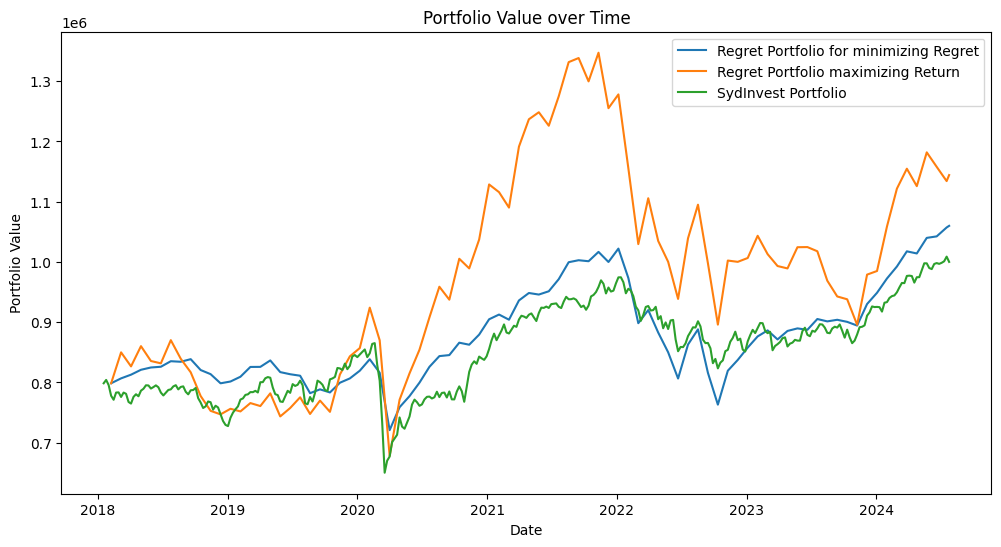

In [43]:
# plot the portfolio value over time for each portfolio in the same plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_return.loc['2018-01-17':], label='Regret Portfolio for minimizing Regret')
plt.plot(portfolio_value_risk.loc['2018-01-17':], label='Regret Portfolio maximizing Return')
plt.plot(portfolio_value.loc['2018-01-17':], label='SydInvest Portfolio')
plt.legend()
plt.title('Portfolio Value over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()